<a href="https://colab.research.google.com/github/Onturk89/NaturalLanguageProcess/blob/main/DD%C4%B0_Proje_%C3%96devi_Onur_T%C3%BCrkmen_234329043.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kullancaƒüƒ±mƒ±z CNN modeli i√ßin tensorflow k√ºt√ºphanesini import ediyoruz

In [ ]:
!pip install "tensorflow==2.8.0"

In [ ]:
import tensorflow as tf

In [ ]:
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.8.0


Kelimeleri k√∂klerine ayƒ±rƒ±p analiz yapabilmek i√ßin zemberek k√ºt√ºphanesinin python k√ºt√ºphanesinden yararlanƒ±lmƒ±≈ütƒ±r

In [ ]:
!pip install zemberek-python

KullanAcaƒüƒ±m dataset i√ßin y√ºkleme i≈ülemi ger√ßekle≈ütirilmi≈ütir.

In [ ]:
!pip install datasets

Dil i≈üleme √ßalƒ±≈ümasƒ± i√ßin nltk k√ºt√ºphanesi; edat baƒüla√ß gibi c√ºmle elemanlarƒ±nƒ±n √∂zne ve y√ºklemin √∂zniteliklerini etkilememesi i√ßin kaldƒ±rƒ±lmasƒ± i√ßin nltk k√ºt√ºphanesi altƒ±nda bulunan stoopwods; y√ºklenen datayƒ± tablo olarak g√∂rebilmek i√ßin pandas k√ºt√ºphanesi; matematiksel i≈ülemler yapabilmek i√ßin numpy k√ºt√ºphanesi; kelimeleri ayrƒ±≈ütƒ±rabilmek i√ßin nltk k√ºt√ºphanesinde bulunan tokenize; kelimeleri g√∂rselle≈ütirebilmek i√ßin WordCloud; n-gram g√∂sterimleri i√ßin collections ve seaborn k√ºt√ºphaneleri eklenmi≈ütir.

In [ ]:
import nltk
from nltk.corpus import stopwords
from datasets import load_dataset
import pandas as pd
import re
import string
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict
import seaborn as sns

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

ƒ∞√ßinde k√ºf√ºrl√º s√∂zler barƒ±ndƒ±ran offenseval2020_tr dataseti y√ºklenmi≈ütir
Y√ºklemeden sonra dataset verisi √ßaƒürƒ±larak verinin i√ßeriƒüi hakkƒ±nda bilgi alƒ±nmƒ±≈ütƒ±r

In [ ]:
dataset1 = load_dataset("offenseval2020_tr")
dataset1

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/31756 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3528 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tweet', 'subtask_a'],
        num_rows: 31756
    })
    test: Dataset({
        features: ['id', 'tweet', 'subtask_a'],
        num_rows: 3528
    })
})

In [ ]:
dataset1["train"][0]

{'id': 20948,
 'tweet': "@USER en g√ºzel uyuyan insan √∂d√ºl√º jeon jungkook'a gidiyor...",
 'subtask_a': 0}

In [ ]:
dataset1["test"][0]

{'id': 41993,
 'tweet': '@USER Sayƒ±n ba≈ükanƒ±m bu ≈üekilde devam in≈üallahüëè',
 'subtask_a': 0}

pandas DataFrame'deki head yardƒ±mƒ±yla datanƒ±n bir √∂n g√∂sterimi yapƒ±lmaktadƒ±r. Hem train hem de test verisi kontrol edilmektedir

In [ ]:
dataset_train = pd.DataFrame(dataset1["train"])
dataset_train.head()

id                                              tweet  subtask_a
0  20948  @USER en g√ºzel uyuyan insan √∂d√ºl√º jeon jungkoo...          0
1  10134  @USER Mekanƒ± cennet olsun, saygƒ±lar sayƒ±n avuk...          0
2  23457  Kƒ±zlar aranƒ±zda kas yƒ±ƒüƒ±nƒ± beylere d√º≈üenler ol...          0
3  18401  Biraz ders √ßalƒ±≈üayƒ±m. Tembellik ve uyku d√º≈üman...          0
4  17525  @USER Trezeguet yerine El Sharawy daha iyi olm...          0

In [ ]:
dataset_train[dataset_train["subtask_a"] == 1].head(30)

id                                              tweet  subtask_a
8    13520  @USER @USER @USER Reis bu √ºlkenin Devlet Ba≈üka...          1
10   20724  ≈ûu kodumun sitesine g√ºnlerce giremeyecek kadar...          1
25   26141     Nasƒ±l o*** √ßocuklarƒ±yla aynƒ± devre denk geldik          1
31   33110  @USER Biz suriyede abd nin kara ordusu ppkpyd ...          1
35   26882  @USER @USER @USER y√∂neticileri olan kul√ºp  dah...          1
36   14668  @USER MHP bu √ºlkenin √ßimentosudur...bunu bilen...          1
38   15499  @USER Okuma oranƒ±n √ßok d√º≈ü√ºk olduƒüu ve g√ºndemi...          1
42   38440     170 boyundayim aq ya nasil kurayim boyle halay          1
61   44048  @USER @USER @USER @USER O imza parasƒ± diye el ...          1
63   12376  Batƒ± Esad ƒ± ger√ßekten durdurmak isteseydi,   B...          1
64   10222  @USER Hahahahahah kƒ±sƒ±k ses ve aƒüƒ±r bir konu≈üm...          1
66   31534  @USER Hersecimde izmiri alƒ±yorsunuz ama hic bi...          1
74   42210  G√ºn ge√ßmiyorki amk √ºlkesinde d√ºzg√ºn bir haber ...          1
77   14056  @USER Size kalsa neler neler yapacaksƒ±nƒ±z da, ...          1
83   14781  ƒ∞srail katlediyor diyorlar israille anla≈üma ya...          1
86   34900  Yapƒ±lan iyilikleri unutacak kadar nank√∂r olmay...          1
90   13470  @USER Adamlarƒ± d√º≈ü√ºr√ºn lige √ßƒ±kƒ±nca da tebrik ...          1
92   41600  @USER Siyasal ƒ∞slamcƒ±lar Ders almazlar. Yahu √á...          1
98   19271  Bir G√ºn Gelecek    Biriniz Bile Kalmayana Kada...          1
107  36325  @USER @USER Ne evli cifti lan orospu ve pezeve...          1
117  19803  @USER Allah belanƒ± versin i≈ü yerinde a√ßtƒ±m b√ºt...          1
122  10298  @USER guzel seyler olsun istiyorsan ben seni s...          1
123  30516         @USER √áok da deƒüil yani hepsi aynƒ± tƒ±rt üòÖüòÖ          1
125  31148  @USER Sizinki fesli kadir mƒ± belgelerle ger√ßek...          1
136  38055  @USER Nasƒ±l bu kadar kaba olabiliyorlar? Uzayd...          1
138  33706  bahsettiƒüiniz iki insanda hetero deƒüil amk haj...          1
143  41771  @USER Birde akp de bedava para alanlarƒ± konuss...          1
145  31611  biz b√≥lme taraftari deƒ£iliz biz akpeyi tara ma...          1
155  28301  Neyse biraz da y√ºz√º koyun uyumaya √ßalƒ±≈üayƒ±m be...          1
158  14703  @USER kendi faziletinden √ßalƒ±yor da farkƒ±nda d...          1

In [ ]:
dataset_train[dataset_train["subtask_a"] == 1]["tweet"][10]

'≈ûu kodumun sitesine g√ºnlerce giremeyecek kadar me≈ügul olduƒüumda b√ºt√ºn sosyal medya hesaplarƒ±mƒ± kapatƒ±cam amk.'

In [ ]:
dataset_train[dataset_train["subtask_a"] == 0] ["tweet"][24]

'@USER A≈ükta √∂yle bi≈üey olsa gerek'

In [ ]:
dataset_test = pd.DataFrame(dataset1["test"])
dataset_test.head()

id                                              tweet  subtask_a
0  41993    @USER Sayƒ±n ba≈ükanƒ±m bu ≈üekilde devam in≈üallahüëè          0
1  23000  Herkes gev≈üekliƒüi kadar duyar kasƒ±yor,hayat b√∂...          0
2  42478  Olgun ili≈ükisi olan arkada≈ü size en g√ºzel hedi...          0
3  21748  @USER @USER Burada atƒ±p tutacaƒüƒ±na o k√∂t√º ko≈üu...          1
4  13607   @USER ƒ∞≈üte o onur dediƒüin sende yok sorun o i≈üte          1

Data √ºzerinde spesifik olarak k√ºf√ºrl√º c√ºmle olup olmadƒ±ƒüƒ±na bakƒ±lacaƒüƒ± i√ßin train ve test datasetleri √∂z√º bozulmadan birle≈ütirilmi≈ütir

In [ ]:
dataset_tweet = pd.concat([dataset_train ,dataset_test], axis=0,ignore_index=True, sort=False)

In [ ]:
dataset_tweet['tweet'][0]

"@USER en g√ºzel uyuyan insan √∂d√ºl√º jeon jungkook'a gidiyor..."

In [ ]:
dataset_tweet.head()

id                                              tweet  subtask_a
0  20948  @USER en g√ºzel uyuyan insan √∂d√ºl√º jeon jungkoo...          0
1  10134  @USER Mekanƒ± cennet olsun, saygƒ±lar sayƒ±n avuk...          0
2  23457  Kƒ±zlar aranƒ±zda kas yƒ±ƒüƒ±nƒ± beylere d√º≈üenler ol...          0
3  18401  Biraz ders √ßalƒ±≈üayƒ±m. Tembellik ve uyku d√º≈üman...          0
4  17525  @USER Trezeguet yerine El Sharawy daha iyi olm...          0

In [ ]:
dataset_tweet.subtask_a.value_counts()

subtask_a
0    28437
1     6847
Name: count, dtype: int64

id bilgisine ihtiya√ß duyulmayacaƒüƒ± i√ßin id kolonu d√º≈ü√ºr√ºlm√º≈üt√ºr

In [ ]:
dataset_tweet = dataset_tweet.drop(['id'], axis = 1)
dataset_tweet.head()

tweet  subtask_a
0  @USER en g√ºzel uyuyan insan √∂d√ºl√º jeon jungkoo...          0
1  @USER Mekanƒ± cennet olsun, saygƒ±lar sayƒ±n avuk...          0
2  Kƒ±zlar aranƒ±zda kas yƒ±ƒüƒ±nƒ± beylere d√º≈üenler ol...          0
3  Biraz ders √ßalƒ±≈üayƒ±m. Tembellik ve uyku d√º≈üman...          0
4  @USER Trezeguet yerine El Sharawy daha iyi olm...          0

Kolon isimleri yapƒ±lacak √ßalƒ±≈üma i√ßin deƒüi≈ütirilmi≈ütir

In [ ]:
dataset_tweet.columns = ["tweet","target"]
dataset_tweet.head()

tweet  target
0  @USER en g√ºzel uyuyan insan √∂d√ºl√º jeon jungkoo...       0
1  @USER Mekanƒ± cennet olsun, saygƒ±lar sayƒ±n avuk...       0
2  Kƒ±zlar aranƒ±zda kas yƒ±ƒüƒ±nƒ± beylere d√º≈üenler ol...       0
3  Biraz ders √ßalƒ±≈üayƒ±m. Tembellik ve uyku d√º≈üman...       0
4  @USER Trezeguet yerine El Sharawy daha iyi olm...       0

@ ifadesi i√ßeren c√ºmlelerin analizi yapƒ±lmƒ±≈ütƒ±r

In [ ]:
dataset_tweet[dataset_tweet['tweet'].str.contains('@')]

tweet  target
0      @USER en g√ºzel uyuyan insan √∂d√ºl√º jeon jungkoo...       0
1      @USER Mekanƒ± cennet olsun, saygƒ±lar sayƒ±n avuk...       0
4      @USER Trezeguet yerine El Sharawy daha iyi olm...       0
5      @USER Bence de olmasƒ± gerekiyor. Hatta meslek ...       0
8      @USER @USER @USER Reis bu √ºlkenin Devlet Ba≈üka...       1
...                                                  ...     ...
35277  @USER Dilerim rabbim seni kahru peri≈üan etsin ...       1
35278  @USER Allahtan hakaret yok yokken b√∂yle yapƒ±lƒ±...       0
35279       @USER √áok iyi oyuncu. Serdar‚Äôdan √ßok √ßok iyi       0
35280  @USER bu g√ºn m…ônim B…ôb…ô≈üimin ad g√ºn√ºd√ºüíúüíúüíúüíú. T…ô...       0
35282                 @USER Okulu bƒ±rak o zaman fbshshsb       0

[16779 rows x 2 columns]

@ i≈üaretine baƒülƒ± kelimeler kaldƒ±rƒ±lmƒ±≈ütƒ±r

In [ ]:
dataset_tweet['tweet'] = dataset_tweet['tweet'].replace('@[A-Za-z0-9]+', '', regex=True).replace('@[A-Za-z0-9]+', '', regex=True)

kaldƒ±rƒ±lma i≈üleminin ba≈üarƒ±lƒ± bir ≈üekilde yapƒ±ldƒ±ƒüƒ± g√∂r√ºlmektedir

In [ ]:
dataset_tweet[dataset_tweet['tweet'].str.contains('@')]

tweet  target
9067   #idev2018 #idev #atlasemlakrealestateoffice @ ...       0
9372   #SnRTEMahkumM√ºjdeBekliyor    adli mahkuma e≈üit...       0
13796    Sn basbakanim bugunun ve gelecgin tarimi zir...       0
13901   Sn basbakanim bugunun ve gelecgin tarimi zira...       0
14652        ke≈üke sonsuzun o sunu @ ile yazmasaymƒ±≈ü ...       0
22922      Sayƒ±n Bakanƒ±m Alan Deƒüi≈üikliƒüi bekliyoruz....       0
23277   Tabiki de beni dinliceksin:@@@ yaz mk nolcak ...       1
26133   "borsada bi laf var" diye girmi≈ütim ben. bknz...       0
28543  #√ß√∂kt√º FIFA WOMEN‚ÄôS WORLD CUP 2019 Hollanda @ ...       0
30063  SAYINCUMHURREIS I @@@@@   TUREMIS DIYONDA    V...       0
30500  O tweetin altƒ±na @ yazƒ±p 3727382. ki≈üiyi etike...       0
31601   Seks hisset ... hisset a≈ükƒ±m # birini sikmeyi...       1

Veri b√ºy√ºk olduƒüu zaman kelimeyi k√∂klerine ayƒ±rma i≈ülemi uzun s√ºrd√ºƒü√º i√ßin veriseti k√º√ß√ºlm√º≈üt√ºr. Her √ßalƒ±≈ütƒ±rƒ±ldƒ±ƒüƒ±nda rastgele se√ßilen bir dataseti k√ºmesi ile √ßalƒ±≈ütƒ±rƒ±lmaktadƒ±r.

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(dataset_tweet["tweet"],
                                                                            dataset_tweet["target"],
                                                                            test_size=0.2)

In [ ]:
data_train = {
  "tweet": train_sentences,
  "target": train_labels
}

In [ ]:
train_tweet = pd.DataFrame(data_train)
train_tweet.head()

tweet  target
24682   √áilek gibi hissediyorum bu kadar √ßok seviyoru...       0
9370     Bunu soylende bir ter√∂rist yanlisi ! utanmak...       1
28712     sen iyi misin yahshshshjs gayet medenice ta...       1
9527    Yalnƒ±zlƒ±gƒ± cekilmez kƒ±lan bircok sebep vardƒ±r...       0
5133   Dedem niye Koreli deƒüil¬ø?   Jimin neden normal...       0

In [ ]:
train_tweet['tweet'][0]

" en g√ºzel uyuyan insan √∂d√ºl√º jeon jungkook'a gidiyor..."

T√ºrk√ßede ge√ßen stopword'ler a≈üaƒüƒ±daki gibidir

In [ ]:
stopword= set(stopwords.words('turkish'))
stopword

{'acaba',
 'ama',
 'aslƒ±nda',
 'az',
 'bazƒ±',
 'belki',
 'biri',
 'birka√ß',
 'bir≈üey',
 'biz',
 'bu',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'en',
 'eƒüer',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hi√ß',
 'ile',
 'ise',
 'i√ßin',
 'kez',
 'ki',
 'kim',
 'mu',
 'm√º',
 'mƒ±',
 'nasƒ±l',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niye',
 'ni√ßin',
 'o',
 'sanki',
 'siz',
 't√ºm',
 've',
 'veya',
 'ya',
 'yani',
 '√ßok',
 '√ß√ºnk√º',
 '≈üey',
 '≈üu'}

Veri setimizde olan stopword'lere bakƒ±lmƒ±≈ütƒ±r

In [ ]:
for text in stopword:
  print(f"{text} : {dataset_tweet.loc[dataset_tweet['tweet'].str.contains(text)].target.value_counts().sum()}")

≈üu : 1576
mƒ± : 7012
nereye : 87
daha : 1665
gibi : 2210
belki : 244
diye : 2691
mu : 4884
hepsi : 274
neden : 671
bazƒ± : 189
bir≈üey : 187
√ßok : 3031
biz : 1720
i√ßin : 3122
ne : 12164
aslƒ±nda : 152
her : 2435
da : 16821
nerde : 171
√ß√ºnk√º : 380
kez : 282
ki : 9816
eƒüer : 491
nerede : 140
o : 29260
nasƒ±l : 1009
birka√ß : 41
hem : 433
defa : 167
ile : 5466
ise : 597
kim : 1563
acaba : 288
niye : 669
ya : 17111
m√º : 2065
yani : 400
de : 19727
hep : 924
≈üey : 2905
ve : 7996
ama : 7590
t√ºm : 529
siz : 2851
az : 7315
ni√ßin : 11
sanki : 181
veya : 210
bu : 8291
en : 21249
hi√ß : 1203
biri : 1246


Stopword'ler ile birlikte noktalama ve √∂zel i≈üaretleri kaldƒ±rmak i√ßin a≈üaƒüƒ±daki fonksiyon yazƒ±lmƒ±≈ütƒ±r.

In [ ]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('https?://\S+|www\.S+','', text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)

  text = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", text)
  text = re.sub("[^a-zA-Zƒü√º≈ü√∂√ßƒ±ƒ∞ƒû√ú≈û√ñ√á ]+", "", text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)

  return text

Fonksiyon datasetimizin tweet kolonuna uygulanmƒ±≈ütƒ±r

In [ ]:
train_tweet["tweet"] = train_tweet["tweet"].apply(clean)
train_tweet.head()

tweet  target
24682   √ßilek hissediyorum kadar seviyorum kendi kend...       0
9370     bunu soylende bir ter√∂rist yanlisi  utanmakd...       1
28712     sen iyi misin yahshshshjs gayet medenice ta...       1
9527    yalnƒ±zlƒ±gƒ± cekilmez kƒ±lan bircok sebep vardƒ±r...       0
5133   dedem koreli deƒüil   jimin normal deƒüil   bunl...       0

Uygulama sonucunda stopword'lerde ne kadar bir azalma olduƒüu kontrool edilmi≈ütir

In [ ]:
for text in stopword:
  print(f"{text} : {train_tweet.loc[train_tweet['tweet'].str.contains(text)].target.value_counts().sum()}")

≈üu : 932
mƒ± : 5040
nereye : 2
daha : 76
gibi : 176
belki : 26
diye : 839
mu : 3961
hepsi : 104
neden : 155
bazƒ± : 62
bir≈üey : 57
√ßok : 172
biz : 1282
i√ßin : 518
ne : 8330
aslƒ±nda : 7
her : 1301
da : 11922
nerde : 97
√ß√ºnk√º : 27
kez : 86
ki : 6910
eƒüer : 310
nerede : 67
o : 23191
nasƒ±l : 51
birka√ß : 2
hem : 250
defa : 44
ile : 3867
ise : 298
kim : 1218
acaba : 12
niye : 247
ya : 13494
m√º : 1823
yani : 86
de : 14938
hep : 283
≈üey : 1406
ve : 4088
ama : 4756
t√ºm : 141
siz : 2301
az : 5668
ni√ßin : 9
sanki : 8
veya : 7
bu : 4551
en : 16745
hi√ß : 328
biri : 772


Etiketleme yapabilmek i√ßin k√ºf√ºrl√º s√∂zc√ºkler indirilmi≈ü ve pandas DataFrame yardƒ±mƒ±yla okutulmu≈ütur.
https://github.com/d35k/Turkish-Swear-Words/blob/master/swears.txt

https://drive.google.com/file/d/13Ta9SfB8HzmDKxFlLmNXfv8IqU13EiWq/view?usp=sharing

In [ ]:
swears_df =  pd.read_csv("/content/drive/MyDrive/DDI_ODEVI/swears.txt",)
swears_df.head()

KufurluSoz
0           abaza
1          abazan
2              ag
3  aƒüzƒ±na sƒ±√ßayƒ±m
4           ahmak

Okunan k√ºf√ºr veri seti kar≈üƒ±la≈ütƒ±rma yapabilmek i√ßin liste haline getirilmi≈ütir

In [ ]:
swears = set(swears_df.KufurluSoz.values)

K√ºf√ºrl√º kelime kontrol√º yapƒ±lmadan √∂nce veri setinin uzunluƒüunu azaltmak i√ßin nadir olan kelimelerden k√ºf√ºrl√º olmayanlarƒ±nƒ± kaldƒ±rmak i√ßin a≈üaƒüƒ±daki fonksiyon yazƒ±lmƒ±≈ütƒ±r

In [ ]:
def remove_rare_words(df, column_name ,exceptionlist, n_rare_words=1000):
    """
    Pandas Framework'te bulunan nadir kelimeleri kaldƒ±rƒ±r

    Bu fonksiyon, metin verilerinde en az g√∂r√ºlen s√∂zc√ºkleri tanƒ±mlar ve kaldƒ±rƒ±r.

    Parametreler:
    df (pandas.DataFrame): Metin datalarƒ±nƒ± i√ßeren DataFrame
    column_name (str): Temizlenecek s√ºtunun adƒ±
    n_rare_words (int): Temizlenecek nadir kelime sayƒ±sƒ±

    Returns:
    pandas.DataFrame: A DataFrame with rare words removed from the specified column.
    """
    # Identifying the rare words
    freq = pd.Series(' '.join(df[column_name]).split()).value_counts()
    rare_words = freq[-n_rare_words:]

    # Removing the rare words
    df[column_name] = df[column_name].apply(lambda x: " ".join(word for word in x.split() if (word not in rare_words or word in exceptionlist  )))
    return df

Kelime k√ºmesinde nadir olan kelimelerden 1000 tanesi kaldƒ±rƒ±lmƒ±≈ütƒ±r

In [ ]:
train_tweet = remove_rare_words(train_tweet, 'tweet' , swears, 1000)
train_tweet.head()

tweet  target
24682  √ßilek hissediyorum kadar seviyorum kendi kendi...       0
9370             bunu bir ter√∂rist yok sizlerde kalmamis       1
28712  sen iyi misin yahshshshjs gayet medenice ben l...       1
9527   yalnƒ±zlƒ±gƒ± cekilmez kƒ±lan bircok sebep vardƒ±r ...       0
5133   dedem koreli deƒüil jimin normal deƒüil bunlar i...       0

Tokenize i≈üleminin kontrol√º ger√ßekle≈ümi≈ütir

In [ ]:
word_tokenize("sitede if≈üa ispiyonculuktan boktan bir", language='turkish', preserve_line=False)

['sitede', 'if≈üa', 'ispiyonculuktan', 'boktan', 'bir']

tokenizedtweet altƒ±nda kelimelerin yapƒ±sƒ± bulunmadan biribirinden ayrƒ±lmƒ±≈ütƒ±r

In [ ]:
train_tweet['tokenizedtweet'] =  train_tweet['tweet'].apply(lambda x: word_tokenize(x, language='turkish', preserve_line=False))
train_tweet.head()

tweet  target  \
24682  √ßilek hissediyorum kadar seviyorum kendi kendi...       0   
9370             bunu bir ter√∂rist yok sizlerde kalmamis       1   
28712  sen iyi misin yahshshshjs gayet medenice ben l...       1   
9527   yalnƒ±zlƒ±gƒ± cekilmez kƒ±lan bircok sebep vardƒ±r ...       0   
5133   dedem koreli deƒüil jimin normal deƒüil bunlar i...       0   

                                          tokenizedtweet  
24682  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...  
9370      [bunu, bir, ter√∂rist, yok, sizlerde, kalmamis]  
28712  [sen, iyi, misin, yahshshshjs, gayet, medenice...  
9527   [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...  
5133   [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...

Zemberek k√ºt√ºphanesinde kelime analizi i√ßin kullanacaƒüƒ±mƒ±z fonksiyonlar indirilmi≈ütir

In [ ]:
from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)

In [ ]:
morphology = TurkishMorphology.create_with_defaults()

INFO:zemberek.morphology.turkish_morphology:TurkishMorphology instance initialized in 7.3797852993011475


2024-05-12 13:15:27,545 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 7.3797852993011475



A≈üaƒüƒ±daki d√∂ng√º ile kelimelerin c√ºmledeki √∂zellikleri (√∂zne, y√ºklem gibi) ile sƒ±nƒ±flandƒ±rƒ±lmasƒ± i≈ülemi POS Tag yardƒ±mƒ±yla yapƒ±lmƒ±≈ütƒ±r

In [ ]:
lemSen = []
for index , row in train_tweet.iterrows():
  words = row["tokenizedtweet"]
  newSentence = []
  for word in words:
    if word == '':
      continue
    else:
      results = morphology.analyze(word)
      if len(results.analysis_results) == 0:
        continue

      newSentence.append(results.analysis_results[0].format_string().split(" ")[0])
  lemSen.append( newSentence)

Olu≈üturulan postagli liste veri setine eklenmi≈ütir

In [ ]:
train_tweet["postaggedtweetwithlemmatize"] = lemSen
train_tweet.head()

tweet  target  \
24682  √ßilek hissediyorum kadar seviyorum kendi kendi...       0   
9370             bunu bir ter√∂rist yok sizlerde kalmamis       1   
28712  sen iyi misin yahshshshjs gayet medenice ben l...       1   
9527   yalnƒ±zlƒ±gƒ± cekilmez kƒ±lan bircok sebep vardƒ±r ...       0   
5133   dedem koreli deƒüil jimin normal deƒüil bunlar i...       0   

                                          tokenizedtweet  \
24682  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...   
9370      [bunu, bir, ter√∂rist, yok, sizlerde, kalmamis]   
28712  [sen, iyi, misin, yahshshshjs, gayet, medenice...   
9527   [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...   
5133   [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...   

                             postaggedtweetwithlemmatize  
24682  [[√ßilek:Noun], [hissetmek:Verb], [kadar:Postp,...  
9370   [[bu:Pron,, [bir:Det], [ter√∂rist:Noun], [yok:C...  
28712  [[se:Noun], [iyi:Adj], [mi:Ques], [gayet:Adv],...  
9527   [[kƒ±lmak:Verb], [sebep:Noun], [varmak:Verb], [...  
5133   [[dede:Noun], [Korel:Noun,, [deƒüil:Conj], [Jim...

Lemmatize i≈ülemi 8-10 dakika gibi bir s√ºrede tamamlanmaktadƒ±r. Denemeler sƒ±rasƒ±nda zaman kaybetmemek adƒ±na √∂rnek bir csv dosyasƒ± kayƒ±t edilmi≈ütir.

In [ ]:
import os
os.makedirs('/content/drive/MyDrive/DigÃÜer', exist_ok=True)
train_tweet.to_csv('/content/NLP_Turkish_Tweets_Lemmatize_Text.csv')

https://drive.google.com/file/d/1--6EGTzIbLEoeJ0WzKPgauOTmPXe_TfD/view?usp=sharing

In [ ]:
train_tweet = pd.read_csv("/content/drive/MyDrive/DDI_ODEVI/NLP_Turkish_Tweets_Lemmatize_Text.csv")

ƒ∞≈ülem ugulandƒ±ktan sonra pos tagli ifadeleri g√∂rebiliyoruz. √ñrneƒüin 3. s√ºtunda k√∂k haline getirilen kelimelerin c√ºmledeki nitelikleri olan isim, y√ºklem etiketlemeye dahil olmu≈ütur

In [ ]:
train_tweet.head()

tweet  target  \
24682  √ßilek hissediyorum kadar seviyorum kendi kendi...       0   
9370             bunu bir ter√∂rist yok sizlerde kalmamis       1   
28712  sen iyi misin yahshshshjs gayet medenice ben l...       1   
9527   yalnƒ±zlƒ±gƒ± cekilmez kƒ±lan bircok sebep vardƒ±r ...       0   
5133   dedem koreli deƒüil jimin normal deƒüil bunlar i...       0   

                                          tokenizedtweet  \
24682  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...   
9370      [bunu, bir, ter√∂rist, yok, sizlerde, kalmamis]   
28712  [sen, iyi, misin, yahshshshjs, gayet, medenice...   
9527   [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...   
5133   [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...   

                             postaggedtweetwithlemmatize  
24682  [[√ßilek:Noun], [hissetmek:Verb], [kadar:Postp,...  
9370   [[bu:Pron,, [bir:Det], [ter√∂rist:Noun], [yok:C...  
28712  [[se:Noun], [iyi:Adj], [mi:Ques], [gayet:Adv],...  
9527   [[kƒ±lmak:Verb], [sebep:Noun], [varmak:Verb], [...  
5133   [[dede:Noun], [Korel:Noun,, [deƒüil:Conj], [Jim...

(NASƒ∞BOGLU & Gencer, 2023) yaptƒ±klarƒ± √ßalƒ±≈ümada olduƒüu gibi Modeli Pos Tagli veri √ºzerinden deneyeceƒüiz o y√ºzden orijinal tweet metni √ßƒ±kartƒ±lmƒ±≈ütƒ±r

In [ ]:
train_tweet.drop(train_tweet.columns[0], axis = 1, inplace =True)
train_tweet.head()

target                                     tokenizedtweet  \
24682       0  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...   
9370        1     [bunu, bir, ter√∂rist, yok, sizlerde, kalmamis]   
28712       1  [sen, iyi, misin, yahshshshjs, gayet, medenice...   
9527        0  [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...   
5133        0  [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...   

                             postaggedtweetwithlemmatize  
24682  [[√ßilek:Noun], [hissetmek:Verb], [kadar:Postp,...  
9370   [[bu:Pron,, [bir:Det], [ter√∂rist:Noun], [yok:C...  
28712  [[se:Noun], [iyi:Adj], [mi:Ques], [gayet:Adv],...  
9527   [[kƒ±lmak:Verb], [sebep:Noun], [varmak:Verb], [...  
5133   [[dede:Noun], [Korel:Noun,, [deƒüil:Conj], [Jim...

PosTagli kolonda yer alan k√∂≈üeli parentez i≈üaretleri veri i≈ülem i√ßin kaldƒ±rƒ±lmƒ±≈ütƒ±r

In [ ]:
def clean_brackets(text):
    """
    K√∂seli parentezleri kaldƒ±rƒ±r

    """
    text = str(text).lower()
    text = text.replace("[","").replace("]","").replace(",","")
    text = ['' if text == '' else text ]
    text = " ".join(text)

    return text

ƒ∞≈ülem sonucu parantezlerin kaldƒ±rƒ±ldƒ±ƒüƒ± g√∂z√ºkmektedir

In [ ]:
train_tweet["ptlTweet"] = train_tweet["postaggedtweetwithlemmatize"].apply(clean_brackets)
train_tweet.head()

target                                     tokenizedtweet  \
24682       0  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...   
9370        1     [bunu, bir, ter√∂rist, yok, sizlerde, kalmamis]   
28712       1  [sen, iyi, misin, yahshshshjs, gayet, medenice...   
9527        0  [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...   
5133        0  [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...   

                             postaggedtweetwithlemmatize  \
24682  [[√ßilek:Noun], [hissetmek:Verb], [kadar:Postp,...   
9370   [[bu:Pron,, [bir:Det], [ter√∂rist:Noun], [yok:C...   
28712  [[se:Noun], [iyi:Adj], [mi:Ques], [gayet:Adv],...   
9527   [[kƒ±lmak:Verb], [sebep:Noun], [varmak:Verb], [...   
5133   [[dede:Noun], [Korel:Noun,, [deƒüil:Conj], [Jim...   

                                                ptlTweet  
24682  '√ßilek:noun' 'hissetmek:verb' 'kadar:postp' 's...  
9370   'bu:pron' 'bir:det' 'ter√∂rist:noun' 'yok:conj'...  
28712  'se:noun' 'iyi:adj' 'mi:ques' 'gayet:adv' 'med...  
9527   'kƒ±lmak:verb' 'sebep:noun' 'varmak:verb' 'unut...  
5133   'dede:noun' 'korel:noun' 'deƒüil:conj' 'jim:nou...

Kelime ve kelimenin c√ºmledeki √∂zniteliƒüi birbirinden ayrƒ±larak kelimenin asƒ±l yapƒ±sƒ± ortaya √ßƒ±kartƒ±lmƒ±≈ütƒ±r

In [ ]:
train_tweet["ptlTweet"] = train_tweet["ptlTweet"].apply(lambda x: " ".join(word for word in x.split(":")))
train_tweet.head()

target                                     tokenizedtweet  \
24682       0  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...   
9370        1     [bunu, bir, ter√∂rist, yok, sizlerde, kalmamis]   
28712       1  [sen, iyi, misin, yahshshshjs, gayet, medenice...   
9527        0  [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...   
5133        0  [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...   

                             postaggedtweetwithlemmatize  \
24682  [[√ßilek:Noun], [hissetmek:Verb], [kadar:Postp,...   
9370   [[bu:Pron,, [bir:Det], [ter√∂rist:Noun], [yok:C...   
28712  [[se:Noun], [iyi:Adj], [mi:Ques], [gayet:Adv],...   
9527   [[kƒ±lmak:Verb], [sebep:Noun], [varmak:Verb], [...   
5133   [[dede:Noun], [Korel:Noun,, [deƒüil:Conj], [Jim...   

                                                ptlTweet  
24682  '√ßilek noun' 'hissetmek verb' 'kadar postp' 's...  
9370   'bu pron' 'bir det' 'ter√∂rist noun' 'yok conj'...  
28712  'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...  
9527   'kƒ±lmak verb' 'sebep noun' 'varmak verb' 'unut...  
5133   'dede noun' 'korel noun' 'deƒüil conj' 'jim nou...

Kelime ayrƒ±mƒ± yapƒ±ldƒ±ktan sonra postagli ilk kolon kaldƒ±rƒ±lmƒ±≈ütƒ±r

In [ ]:
train_tweet = train_tweet.drop(["postaggedtweetwithlemmatize"], axis = 1)
train_tweet.head()

target                                     tokenizedtweet  \
24682       0  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...   
9370        1     [bunu, bir, ter√∂rist, yok, sizlerde, kalmamis]   
28712       1  [sen, iyi, misin, yahshshshjs, gayet, medenice...   
9527        0  [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...   
5133        0  [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...   

                                                ptlTweet  
24682  '√ßilek noun' 'hissetmek verb' 'kadar postp' 's...  
9370   'bu pron' 'bir det' 'ter√∂rist noun' 'yok conj'...  
28712  'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...  
9527   'kƒ±lmak verb' 'sebep noun' 'varmak verb' 'unut...  
5133   'dede noun' 'korel noun' 'deƒüil conj' 'jim nou...

Hangi tweet'de k√ºf√ºr olduƒüunun tespit i√ßin yeni bir kolon eklenecektir

In [ ]:
swearExists = np.zeros(len(train_tweet))

In [ ]:
train_tweet["SwearExists"] = pd.DataFrame(swearExists, index= train_tweet.index)
train_tweet.head()

target                                     tokenizedtweet  \
24682       0  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...   
9370        1     [bunu, bir, ter√∂rist, yok, sizlerde, kalmamis]   
28712       1  [sen, iyi, misin, yahshshshjs, gayet, medenice...   
9527        0  [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...   
5133        0  [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...   

                                                ptlTweet  SwearExists  
24682  '√ßilek noun' 'hissetmek verb' 'kadar postp' 's...          0.0  
9370   'bu pron' 'bir det' 'ter√∂rist noun' 'yok conj'...          0.0  
28712  'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...          0.0  
9527   'kƒ±lmak verb' 'sebep noun' 'varmak verb' 'unut...          0.0  
5133   'dede noun' 'korel noun' 'deƒüil conj' 'jim nou...          0.0

K√ºf√ºrl√º olup olmadƒ±ƒüƒ±nƒ±n kar≈üƒ±la≈ütƒ±rƒ±lmasƒ± 0 ve 1 √ºzerinden yapƒ±lacaƒüƒ± i√ßin double veri tipindeki SwearExists kolonu int64'e √ßevrilmi≈ütir

In [ ]:
train_tweet["SwearExists"] = train_tweet["SwearExists"].astype('int64')
train_tweet.head()

target                                     tokenizedtweet  \
24682       0  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...   
9370        1     [bunu, bir, ter√∂rist, yok, sizlerde, kalmamis]   
28712       1  [sen, iyi, misin, yahshshshjs, gayet, medenice...   
9527        0  [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...   
5133        0  [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...   

                                                ptlTweet  SwearExists  
24682  '√ßilek noun' 'hissetmek verb' 'kadar postp' 's...            0  
9370   'bu pron' 'bir det' 'ter√∂rist noun' 'yok conj'...            0  
28712  'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...            0  
9527   'kƒ±lmak verb' 'sebep noun' 'varmak verb' 'unut...            0  
5133   'dede noun' 'korel noun' 'deƒüil conj' 'jim nou...            0

indekslemeyle ilgili uyarƒ± mesajlarƒ± akƒ±≈üta √ßok yer kapladƒ±ƒüƒ± i√ßin burdaki uyarƒ± mesajlarƒ± kapatƒ±lmƒ±≈ütƒ±r

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

K√ºf√ºrl√º mesajƒ±n bulunduƒüu tweet bulunarak aynƒ± satƒ±rdaki SwearExists kolonu 1 olarak i≈üaretlenmi≈ütir

In [ ]:
for index , row in train_tweet.iterrows():
  features = row["ptlTweet"].replace("'","").split(" ")
  for word in features:
    if word in swears:
      train_tweet.SwearExists[index] = 1

K√ºf√ºrl√º e≈üle≈ümelerin bazƒ±larƒ± a≈üaƒüƒ±da g√∂sterilmi≈ütir

In [ ]:
train_tweet[train_tweet["SwearExists"] == 1].head()

target                                     tokenizedtweet  \
9370        1     [bunu, bir, ter√∂rist, yok, sizlerde, kalmamis]   
5133        0  [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...   
12156       0  [misafir, habersiz, gelir, rƒ±zƒ±k, kader, √∂l√ºm,...   
5788        0  [biraz, zam, yapmalarƒ±, durumunda, ≈üeytanlar, ...   
27054       1  [neler, oluyor, neler, istiklal, mar≈üƒ±nƒ±n, oku...   

                                                ptlTweet  SwearExists  
9370   'bu pron' 'bir det' 'ter√∂rist noun' 'yok conj'...            1  
5133   'dede noun' 'korel noun' 'deƒüil conj' 'jim nou...            1  
12156  'misafir noun' 'haber noun' 'gelmek verb' 'rƒ±z...            1  
5788   'biraz adj' 'zam noun' 'yapmak verb' 'durum no...            1  
27054  'ne noun' 'olmak verb' 'ne noun' 'istikl√¢l nou...            1

K√ºf√ºrl√º kelime vurgulanmak i√ßin  Patel, R., & Passi, K. (2020). Sentiment analysis on twitter data of world cup soccer tournament using machine learning. IoT, 1(2), 14. kullanƒ±ldƒ±ƒüƒ± gibi "_NEG ifadesi eklenmi≈ütir"

In [ ]:
taggedSen = []
for index , row in train_tweet.iterrows():
  newSentence = []
  features = row["tokenizedtweet"]
  for word in features:
    if word == '':
      continue
    if word in swears:
      newSentence.append(word + "_NEG")
    else:
      newSentence.append(word)
  taggedSen.append(newSentence)

In [ ]:
len(train_tweet)

28227

In [ ]:
taggedSen[:10]

[['√ßilek',
  'hissediyorum',
  'kadar',
  'seviyorum',
  'kendi',
  'kendime',
  'konu≈üuyorum'],
 ['bunu', 'bir', 'ter√∂rist_NEG', 'yok', 'sizlerde', 'kalmamis'],
 ['sen',
  'iyi',
  'misin',
  'yahshshshjs',
  'gayet',
  'medenice',
  'ben',
  'laf',
  'sokmaya',
  'falan',
  'emin',
  'ol'],
 ['yalnƒ±zlƒ±gƒ±',
  'cekilmez',
  'kƒ±lan',
  'bircok',
  'sebep',
  'vardƒ±r',
  'unutma',
  'yalnƒ±zlƒ±kbize',
  'gercek',
  'dostlarƒ±mƒ±zƒ±n',
  'oldugunu',
  'hatƒ±rlatƒ±r'],
 ['dedem',
  'koreli',
  'deƒüil',
  'jimin',
  'normal',
  'deƒüil',
  'bunlar',
  'i≈üler',
  'farklƒ±',
  'olabilirdi'],
 ['beni', '√ºzd√º', 'cidden'],
 ['misafir',
  'habersiz',
  'gelir',
  'rƒ±zƒ±k',
  'kader',
  '√∂l√ºm',
  'allahƒ±m',
  'helal',
  'g√ºzel',
  'imanlƒ±',
  'eyle'],
 ['g√ºnd√ºzleri', 'pozitif', 'geceleri', 'negatif', 'd√º≈ü√ºn√ºyorum', 'b√∂yle'],
 ['selo', 'ba≈ükan', 'seni', 'asla', 'ba≈ükan', 'yapmayacaƒüƒ±z'],
 ['≈üeyi',
  'fazla',
  'd√º≈ü√ºnmekle',
  'zerre',
  'kadar',
  'umrumda',
  'olma

Etiketlenmi≈ü tweet ayrƒ± bir kolon olarak eklenmi≈ütir

In [ ]:
train_tweet["taggedTweet"] =  taggedSen
train_tweet.head()

target                                     tokenizedtweet  \
24682       0  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...   
9370        1     [bunu, bir, ter√∂rist, yok, sizlerde, kalmamis]   
28712       1  [sen, iyi, misin, yahshshshjs, gayet, medenice...   
9527        0  [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...   
5133        0  [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...   

                                                ptlTweet  SwearExists  \
24682  '√ßilek noun' 'hissetmek verb' 'kadar postp' 's...            0   
9370   'bu pron' 'bir det' 'ter√∂rist noun' 'yok conj'...            1   
28712  'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...            0   
9527   'kƒ±lmak verb' 'sebep noun' 'varmak verb' 'unut...            0   
5133   'dede noun' 'korel noun' 'deƒüil conj' 'jim nou...            1   

                                             taggedTweet  
24682  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...  
9370   [bunu, bir, ter√∂rist_NEG, yok, sizlerde, kalma...  
28712  [sen, iyi, misin, yahshshshjs, gayet, medenice...  
9527   [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...  
5133   [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...

Word cloud'da k√ºf√ºr√ºn yer aldƒ±ƒüƒ± tweetlerde en √ßok ge√ßen kelimeler g√∂sterilmi≈ütir

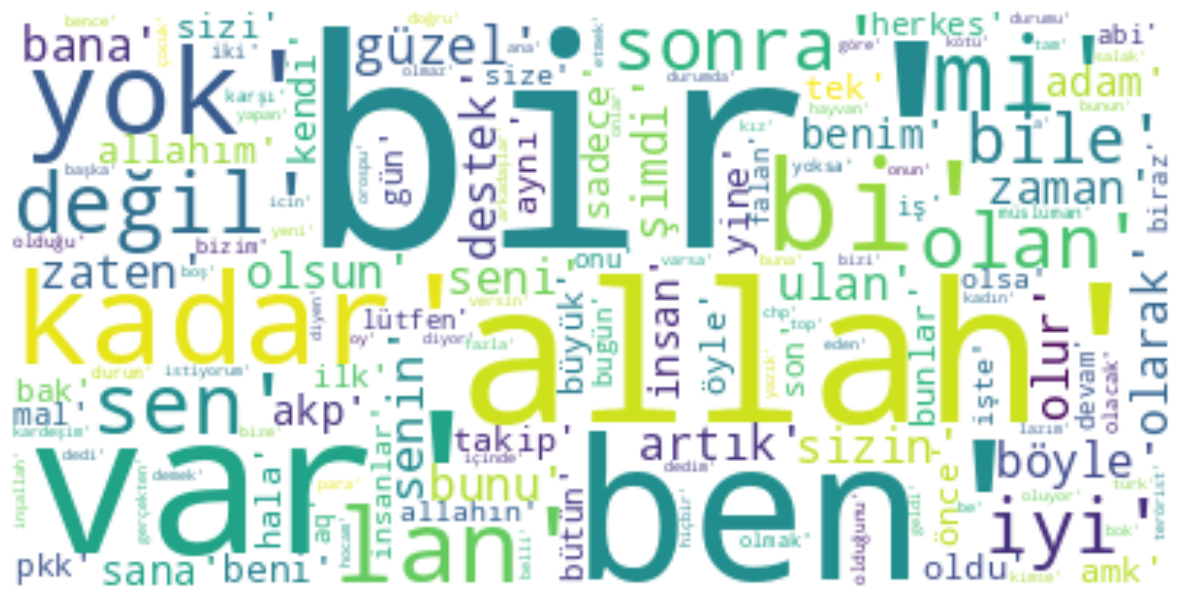

In [ ]:
text = " ".join(i for i in train_tweet[train_tweet["SwearExists"] == 1].taggedTweet.apply(lambda x: " ".join(word for word in x)))
wordcloud = WordCloud(stopwords=stopword, background_color="white").generate(text.replace("_NEG",""))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

2'li n-gram √ºzerinden k√ºf√ºrl√º ve k√ºf√ºrs√ºz tweetlerdeki kelimelerin sƒ±klƒ±ƒüƒ± a≈üaƒüƒ±da g√∂sterilmi≈ütir. Grafikte k√ºf√ºrl√º s√∂zc√ºƒü√ºn birebir yakalanmasƒ± yapƒ±lan √ßalƒ±≈ümayla ilgili olumlu i≈üaret vermektedir

In [ ]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stopword]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [ ]:
# Bigrams
swear_bigrams = defaultdict(int)
nonswear_bigrams = defaultdict(int)

In [ ]:
swear_tweets = train_tweet["SwearExists"] == 1

In [ ]:
for tweet in train_tweet[swear_tweets]['tweet']:
    for word in generate_ngrams(tweet, n_gram = 2):
        swear_bigrams[word] += 1

In [ ]:
nonswear_tweets = train_tweet["SwearExists"] == 0

In [ ]:
for tweet in train_tweet[nonswear_tweets]['tweet']:
    for word in generate_ngrams(tweet, n_gram = 2):
        nonswear_bigrams[word] += 1

In [ ]:
swear_bigrams_df = pd.DataFrame(sorted(swear_bigrams.items(), key=lambda x: x[1])[::-1])
nonswear_bigrams_df = pd.DataFrame(sorted(nonswear_bigrams.items(), key=lambda x: x[1])[::-1])

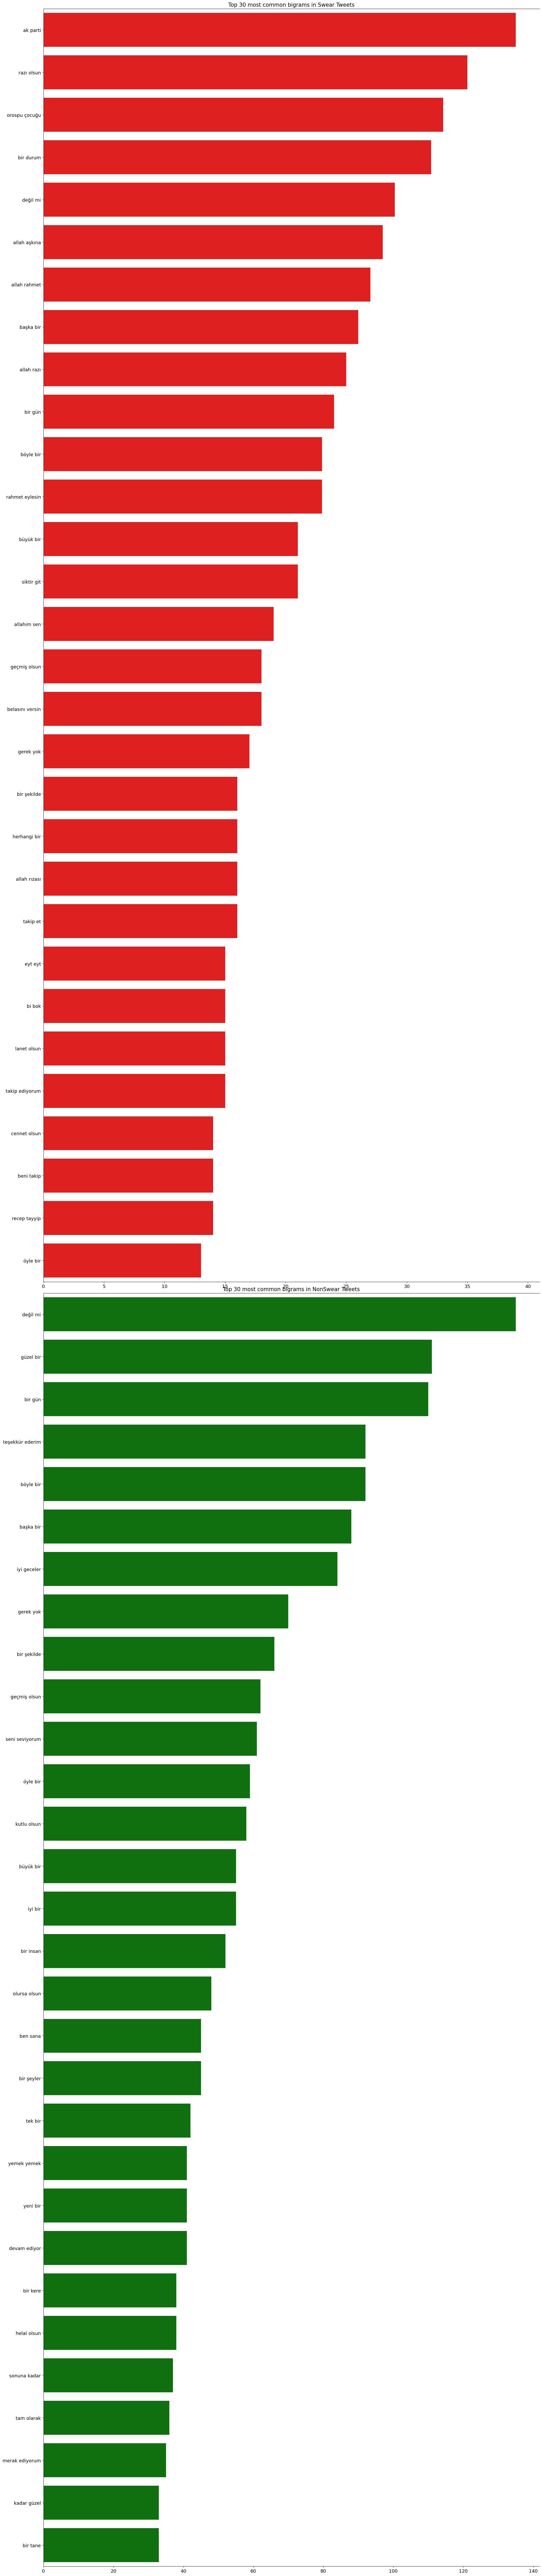

In [ ]:
N = 30

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(20, 100), dpi=100)
plt.tight_layout()

sns.barplot(y=swear_bigrams_df[0].values[:N], x=swear_bigrams_df[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=nonswear_bigrams_df[0].values[:N], x=nonswear_bigrams_df[1].values[:N], ax=axes[1], color='green')


for i in range(2):
  axes[i].spines['right'].set_visible(False)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].tick_params(axis='x', labelsize=13)
  axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Swear Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in NonSwear Tweets', fontsize=15)


plt.show()

In [ ]:
train_tweet.head()

target                                     tokenizedtweet  \
24682       0  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...   
9370        1     [bunu, bir, ter√∂rist, yok, sizlerde, kalmamis]   
28712       1  [sen, iyi, misin, yahshshshjs, gayet, medenice...   
9527        0  [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...   
5133        0  [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...   

                                                ptlTweet  SwearExists  \
24682  '√ßilek noun' 'hissetmek verb' 'kadar postp' 's...            0   
9370   'bu pron' 'bir det' 'ter√∂rist noun' 'yok conj'...            1   
28712  'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...            0   
9527   'kƒ±lmak verb' 'sebep noun' 'varmak verb' 'unut...            0   
5133   'dede noun' 'korel noun' 'deƒüil conj' 'jim nou...            1   

                                             taggedTweet  
24682  [√ßilek, hissediyorum, kadar, seviyorum, kendi,...  
9370   [bunu, bir, ter√∂rist_NEG, yok, sizlerde, kalma...  
28712  [sen, iyi, misin, yahshshshjs, gayet, medenice...  
9527   [yalnƒ±zlƒ±gƒ±, cekilmez, kƒ±lan, bircok, sebep, v...  
5133   [dedem, koreli, deƒüil, jimin, normal, deƒüil, b...

Yapay zeka modeli tasarlamak i√ßin modelde kullanƒ±lacak kolonlar ayrƒ±lmƒ±≈ütƒ±r

In [ ]:
df_tweet = train_tweet[["ptlTweet","target", "SwearExists" ]].copy()
df_tweet.head()

ptlTweet  target  SwearExists
24682  '√ßilek noun' 'hissetmek verb' 'kadar postp' 's...       0            0
9370   'bu pron' 'bir det' 'ter√∂rist noun' 'yok conj'...       1            1
28712  'se noun' 'iyi adj' 'mi ques' 'gayet adv' 'med...       1            0
9527   'kƒ±lmak verb' 'sebep noun' 'varmak verb' 'unut...       0            0
5133   'dede noun' 'korel noun' 'deƒüil conj' 'jim nou...       0            1

In [ ]:
df_tweet[df_tweet["SwearExists"] == 1].head()

ptlTweet  target  SwearExists
6   'kanka noun' '≈üark noun' 's√∂z noun' 'lan inter...       0            1
9   'ekrem noun' 'iÃámamoƒülu noun' 'beledi noun' 'b...       1            1
28  'hak noun' 'teslim interj' 'etmek verb' 'm√ºthi...       1            1
29  'siz pron' 'sevmek verb' 'can noun' 'almak ver...       0            1
47  'jong noun' 'un noun' 'adami noun' 'dip noun' ...       1            1

Vekt√∂rleme √ßalƒ±≈ümasƒ± yapƒ±lƒ±rken en √ßok ka√ß kelimelik bir model kullanƒ±lacaƒüƒ± istenmektedir. A≈üaƒüƒ±daki √ßalƒ±≈ümada tweetlerdeki kelime sayƒ±larƒ± bulunmu≈ütur. En sonda yapƒ±lan kodlamayla kelime sayƒ±sƒ±nƒ±n ortalamasƒ±na standart sapmada eklenerek en fazla kullanƒ±lacak kelime sayƒ±sƒ±na ula≈üƒ±lmƒ±≈ütƒ±r

In [ ]:
df_sentence_count = pd.DataFrame([len(str(i).split()) for i in df_tweet["ptlTweet"]])
df_sentence_count.head()

0
0  14
1  10
2  22
3  14
4  20

In [ ]:
max_length = int(round(df_sentence_count.iloc[:].mean()  + df_sentence_count.loc[:].std())[0])
max_length

37

Yukarƒ±daki i≈ülemdeki kelime sayƒ±sƒ± toplanarak vocabulary geni≈ü tutulmu≈ütur

In [ ]:
max_vocab_length = int(df_sentence_count.sum())
max_vocab_length

<ipython-input-59-b72cec645c95>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  max_vocab_length = int(df_sentence_count.sum())


628526

Vekt√∂rleme modelinde n gram 2 se√ßilince kelimeler 2'li tutulduƒüu i√ßin en fazla kelime sayƒ±sƒ± 2 ile √ßarpƒ±lmƒ±≈ütƒ±r

In [ ]:
#n_gram =2 i√ßin

max_length = 2 * max_length

Modeli eƒüitmek i√ßin daha √∂nce ayƒ±rdƒ±ƒüƒ±mƒ±z veri setimiz burada tekrar train ve test olarak ayrƒ±lmƒ±≈ütƒ±r

In [ ]:
X = df_tweet["ptlTweet"].values

In [ ]:
y = df_tweet["SwearExists"].values

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(X,
                                                                            y,
                                                                            test_size=0.4, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [ ]:
from tensorflow.keras.layers import TextVectorization

Vekt√∂rleme yapƒ±larak eƒüitim c√ºmlelerine adapte edilmi≈ütir.

In [ ]:
# Setting up text vectorization
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    ngrams=2,
                                    output_mode='int',
                                    output_sequence_length= max_length)

# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

Embedding ile vekt√∂r√ºn hangi boyutta hangi y√∂nde olacaƒüƒ± belirlenmi≈ütir

In [ ]:
embedding = tf.keras.layers.Embedding(input_dim= max_vocab_length,
                                      output_dim = 128,
                                      embeddings_initializer = 'uniform',
                                      input_length = max_length)

Kullanƒ±lacak CNN algoritmasƒ±nda √ßƒ±ktƒ±yla uyum i√ßin eƒüitim ve test etiketleri sƒ±kƒ±≈ütƒ±rƒ±lmƒ±≈ütƒ±r

In [ ]:
train_labels = train_labels.reshape(-1,1)
train_labels

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
test_labels = val_labels.reshape(-1,1)
test_labels

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

Veri setimizi tensorflow'da kullanacaƒüƒ±mƒ±z i√ßin modele uygun hale getiriyoruz

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, test_labels))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

Modelin eƒüitimini verimli yapabilmesi i√ßin giri≈ü verilerini 32'li hale getiriyoruz

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [ ]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()

In [ ]:
token_embed = tf.keras.layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding")

In [ ]:
# Create 1D convolutional model to process sequences
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = tf.keras.layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 74)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 74, 128)          6593280   
                                                                 
 conv1d (Conv1D)             (None, 74, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 65    

Model sonucundaki doƒüruluk y√ºksek olmasƒ±na raƒümen model beklendiƒüi gibi √ßalƒ±≈ümamaktadƒ±r. Modelin ger√ßekten √∂ƒürendiƒüinden (ezberleme veya genelleme yapmadan) emin olmamamƒ±z i√ßin model belirli bir kayƒ±pla artarak √∂ƒürenmeliydi. Ya etiketli √∂ƒürenme i√ßin bir dezavantaj s√∂z konusu ya da veri setleri tekrar g√∂zden ge√ßirilmeli

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_dataset,
                              epochs=5,
                              validation_data=valid_dataset,
                              )

Epoch 1/5
530/530 [==============================] - 16s 29ms/step - loss: 0.0000e+00 - accuracy: 0.8351 - val_loss: 0.0000e+00 - val_accuracy: 0.8338
Epoch 2/5
530/530 [==============================] - 13s 25ms/step - loss: 0.0000e+00 - accuracy: 0.8363 - val_loss: 0.0000e+00 - val_accuracy: 0.8338
Epoch 3/5
530/530 [==============================] - 13s 24ms/step - loss: 0.0000e+00 - accuracy: 0.8363 - val_loss: 0.0000e+00 - val_accuracy: 0.8338
Epoch 4/5
530/530 [==============================] - 13s 24ms/step - loss: 0.0000e+00 - accuracy: 0.8363 - val_loss: 0.0000e+00 - val_accuracy: 0.8338
Epoch 5/5
530/530 [==============================] - 13s 24ms/step - loss: 0.0000e+00 - accuracy: 0.8363 - val_loss: 0.0000e+00 - val_accuracy: 0.8338


Eƒüer model beklendiƒüi gibi √ßalƒ±≈üsaydƒ± a≈üaƒüƒ±daki fonksiyon ile doƒüruluk oranlarƒ±nƒ± hesaplanacaktƒ±

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Calculate model_5 metrics
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_results = calculate_results(y_true=test_labels,
                                    y_pred=model_1_preds)
model_1_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 83.384996900186,
 'precision': 0.6953057708044027,
 'recall': 0.8338499690018599,
 'f1': 0.7583016959482769}

A≈üaƒüƒ±daki Confusion Matrix'den anlayabildiƒüim kadarƒ±yla modeli valide eden datanƒ±n hepsi k√ºf√ºrl√º olduƒüu i√ßin model her gelen tweet'i k√ºf√ºrl√º olarak sƒ±nƒ±flandƒ±rmƒ±≈ütƒ±r

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
class_names = np.array(["kufursuz","kufurlu"])

In [ ]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=class_names,
        cmap=plt.cm.Blues
    )

    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

    disp.ax_.set_title("Karƒ±≈üƒ±klƒ±k Matrisi " + dataset + " Dataseti -- Recall Skoru: " + str(model_recall.round(2)))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


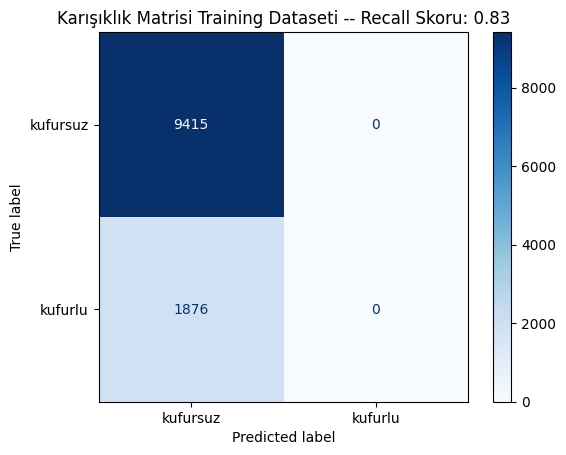

In [ ]:
y_pred_probs_valid = model_1.predict(valid_dataset)
y_pred_valid = tf.argmax(y_pred_probs_valid, axis=1)
displayConfusionMatrix(test_labels, y_pred_valid, "Training")

In [ ]:
NB_START_EPOCHS = 5

In [ ]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

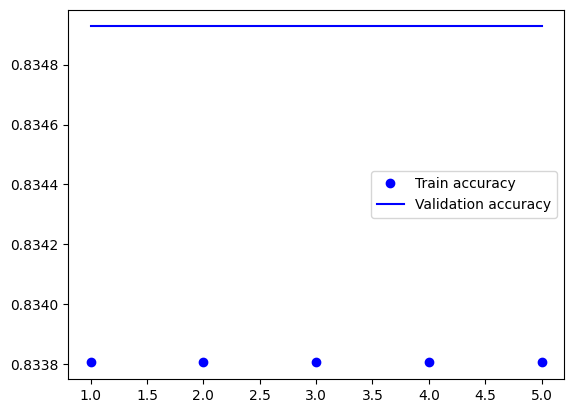

In [ ]:
eval_metric(model_1_history, 'accuracy')

BERT MODEL

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/263k [00:00<?, ?B/s]

In [ ]:
X = df_tweet["ptlTweet"].values

In [ ]:
y = df_tweet["SwearExists"].values

In [ ]:
df_tweet["SwearExists"].value_counts()

SwearExists
0    23539
1     4688
Name: count, dtype: int64

In [ ]:
max_token = []
for sent in X:
  for sent2 in sent.split(" "):
    sent2.replace("'","")
    if isinstance(sent2, int):
      continue
    else:
      input_ids = tokenizer.encode(sent2, add_special_tokens=True)
      max_token.append(len(input_ids))


    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

print('Max sentence length: ', max(max_token))

Max sentence length:  12


In [ ]:
def transformation(X):
  # set array dimensions
  seq_len = 160

  # input_ids'ler i√ßin Xids bo≈ü listesini, attention_mask'ler i√ßin Xmask bo≈ü listesini olu≈üturuyoruz.
  Xids = []
  Xmask = []


  for sentence in X: # corpustan t√ºm yorumlarƒ± sƒ±rayla √ßekiyoruz.

      tokens = tokenizer.encode_plus(sentence, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)
      # √ßektiƒüimiz herbir yorumu(sentence) vekt√∂rlere d√∂n√º≈üt√ºr√ºyoruz.

      # assign tokenized outputs to respective rows in numpy arrays
      Xids.append(tokens['input_ids']) # her bir yoruma kar≈üƒ±lƒ±k gelen input_ids vekt√∂r√ºn√º Xids listesine append ediyoruz.
      Xmask.append(tokens['attention_mask'])

  return np.array(Xids), np.array(Xmask) # Xids ve Xmask listelerini np.array ile (yorum sayƒ±sƒ±, 160) boyutlarƒ±nda matrixlere d√∂n√º≈üt√ºr√ºyoruz.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [ ]:
X_df = pd.DataFrame(y_train, columns=["swearexists"])
X_df

swearexists
0                0
1                0
2                0
3                0
4                0
...            ...
22576            0
22577            0
22578            0
22579            0
22580            1

[22581 rows x 1 columns]

In [ ]:
X_df["swearexists"].value_counts()

swearexists
0    18860
1     3721
Name: count, dtype: int64

In [ ]:
Xids_train, Xmask_train = transformation(X_train)

# Train setimiz i√ßin 2 ayrƒ± matriximizi d√ºzenliyoruz.

Xids_test, Xmask_test  = transformation(X_test)
# Test setimiz i√ßin de 2 ayrƒ± matriximizi d√ºzenliyoruz.

In [ ]:
labels_train = y_train.reshape(-1,1)
labels_train

# BERT modelleri target'ƒ± da bir matrix olarak ister. Bu sebeple y_train targetƒ±mƒ±zƒ± (len(y_train), 1) boyutunda bir matrix'e d√∂n√º≈üt√ºr√ºyoruz.

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(160,), dtype=tf.int64, name=None), TensorSpec(shape=(160,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(160,), dtype=tf.int64, name=None), TensorSpec(shape=(160,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

# Yukarƒ±da elde ettiƒüimiz tens√∂rlerden hangisi 'input_ids' hangisi 'attention_mask' ve hangisi labels model bunlarƒ± bilemez. Bu sebeple
# bu bilgiyi bizim modele saƒülamamƒ±z gerekiyor. Bunun i√ßin yukarƒ±daki fonksiyonu tanƒ±mlƒ±yoruz.
# s√ºsl√º parantez i√ßerisine 'input_ids' ve  'attention_mask' tanƒ±mlamamƒ±zƒ± yapƒ±yoruz. Labels'ƒ± s√ºsl√º parantez dƒ±≈üarƒ±sƒ±nda bƒ±rakƒ±yoruz.

In [ ]:
# map_func metodunu datasete mapliyoruz
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [ ]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_ds = dataset_train.batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = dataset_test.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras import layers
from transformers import TFAutoModel
from tensorflow.keras import Model

In [ ]:
def create_model():
    # BERTT√ºrk modeli sadece pytorch tens√∂rleri √ºzerinden eƒüitildiƒüinden modelin Tensorflow k√ºt√ºphanesi ile √ßalƒ±≈üabilmesi i√ßin AutoModel yerine TFAutoModel yazƒ±yoruz.

    model = TFAutoModel.from_pretrained("dbmdz/bert-base-turkish-uncased")
    # Notebookun yeralan huggingface bert t√ºrk linkinden model kurma i≈ülemlemleri i√ßin gerekli olan kodlarƒ± aynen alƒ±yoruz.
    # Tokenization i≈ülemleri "dbmdz/bert-base-turkish-uncased" ile yapƒ±ldƒ±ƒüƒ±ndan eƒüitimide "dbmdz/bert-base-turkish-uncased" ile yapmamƒ±z gerekiyor.
    # "dbmdz/bert-base-turkish-cased" ile eƒüitim yapƒ±lƒ±rsa sonu√ßlarƒ±mƒ±z k√∂t√º √ßƒ±kacaktƒ±r.

    input_ids = tf.keras.layers.Input(shape=(160,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(160,), name='attention_mask', dtype='int32')
    # inputlarƒ±mƒ±z token embeddings (input_ids) ve position embeddings (attention_mask)'den olu≈ütuƒüundan herbiri i√ßin bir input layer olu≈üturuyoruz.
    # Her bir g√∂zlem i√ßin input layerlarƒ±mƒ±zƒ±n boyutlarƒ±nƒ± (shape= (160,)) veriyoruz.
    # modelin bu layerlarƒ± biribirinden ayƒ±rt edebilmesi i√ßin name olarak map_func fonksiyonu i√ßinde belirlediƒüimiz isimleri kullanƒ±yoruz. Farklƒ± isimler kullanƒ±lƒ±rsa model
    # hata d√∂nd√ºr√ºr.
    # BERT modelleri dtype= "int32" olarak √ßalƒ±≈üƒ±r. Bu sebeple dtype="int32" olarak belirtiyoruz.

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
    # embeddings layer, BERT model √ºzerinde daha √∂nce eƒüitilip hafƒ±zasƒ±nda tutulan word embeddingleri √ßektiƒüimiz katmandƒ±r.
    # √áekilen Word embeddingler birle≈ütirilerek sentence embeddinglere d√∂n√º≈üt√ºr√ºl√ºr.
    # Elde ettiƒüimiz sentence embeddinglerin olumlu mu olumsuz mu olduƒüuna dair eƒüitimimizi Dense layer √ºzerinde yapacaƒüƒ±z.

    x = tf.keras.layers.Dense(32, activation='relu')(embeddings)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x) #0.1 oranƒ± developerlar tarafƒ±ndan tavsiye edilen orandƒ±r.
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x) # outputumuz d√∂nd√ºr√ºyor.


    # Embeddings layerdan elde ettiƒüimiz sentence embeddingsleri Dense layer'a g√∂ndermek i√ßin Dense() layerdan sonra bir tuple a√ßƒ±p i√ßerisine bir √∂nceki layerƒ±n ismini yazƒ±yoruz
    # Aynen burda olduƒüu gibi "Dense(160, activation='relu')(embeddings)". Bu sayede embeddings layerdaki bilgiler Dense layera aktarƒ±lmƒ±≈ü oldu.


    return Model(inputs=[input_ids, attention_mask], outputs=y)
    # son a≈üamada elde ettiƒüimiz input ve outputlar Model fonksiyonu i√ßine tanƒ±mlanƒ±r.

# modeli bir fonksiyon i√ßinde kurma sebebimiz a≈üaƒüƒ±daki strategy.scope() kapsamƒ±nda yapacaƒüƒ±mƒ±z i≈ülemlerin daha sade g√∂r√ºnmesi i√ßin yoksa burdaki t√ºm kodlarƒ± strategy.scope()
# altƒ±nda yazmamƒ±z gerekecekti.

Buradaki projede k√ºf√ºrl√º tweetleri a≈üaƒüƒ±daki daƒüƒ±lƒ±mla g√∂rm√º≈üt√ºk.

swearexists
0    18860
1     3721
Name: count, dtype: int64

Dengesiz daƒüƒ±lƒ±mlƒ± bir veri olduƒüu i√ßin ba≈üarƒ± metriƒüini ger√ßek pozitiflerin ba≈üarƒ±sƒ±na odaklanan Recall olarak belirledim

√áƒ±ktƒ± k√ºf√ºrl√º veya k√ºf√ºrl√º deƒüil olduƒüu i√ßin loss BinaryCrossentropy olarak belirledim.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Recall

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = BinaryCrossentropy()
recall = Recall()
model = create_model()
model.compile(optimizer=optimizer, loss=loss, metrics=[recall])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tf_model.h5:   0%|          | 0.00/545M [00:00<?, ?B/s]

Some layers from the model checkpoint at dbmdz/bert-base-turkish-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at dbmdz/bert-base-turkish-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 160)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 160)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  110617344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 160,                                           

! Modelin eƒüitilmesi 7 saat civarƒ± s√ºrmektedir. Model fit'in altƒ±nda bulunan kayƒ±t edilmi≈ü loaded_model kullanƒ±labilinir

In [ ]:
epochs = 3
model.fit(train_ds, epochs=3, validation_data= val_ds)

Epoch 1/3
706/706 [==============================] - 7831s 11s/step - loss: 0.3732 - recall: 0.7353 - val_loss: 0.1641 - val_recall: 0.7342
Epoch 2/3
706/706 [==============================] - 7667s 11s/step - loss: 0.1655 - recall: 0.8723 - val_loss: 0.0916 - val_recall: 0.9462
Epoch 3/3
706/706 [==============================] - 7517s 11s/step - loss: 0.1121 - recall: 0.9495 - val_loss: 0.1002 - val_recall: 0.9514


In [ ]:
model.save("/content/drive/MyDrive/DDI_ODEVI/ddiModel_onurturkmen_234329043",save_format='tf')

Eƒüitilmi≈ü model a≈üaƒüƒ±daki link √ºzerinden y√ºklenebilinir

https://drive.google.com/drive/folders/117yUoE_G-P5PHX9oWKXeAahJUPFJE5xI?usp=sharing

In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/DDI_ODEVI/ddiModel_onurturkmen_234329043")

In [ ]:
loaded_model.evaluate(val_ds)

177/177 [==============================] - 564s 3s/step - loss: 0.1002 - recall: 0.9514


[0.10022921860218048, 0.9513960480690002]

validation verisi √ºzerinden tahmin olasƒ±lƒ±klarƒ±nƒ± bulup ikili sƒ±nƒ±f i√ßin yuvarlama yaparak sonu√ßlarƒ± kayƒ±t ederiz

In [ ]:
model_pred_probs = loaded_model.predict(val_ds)
model_pred_probs

array([[0.08554938],
       [0.99999964],
       [0.99999344],
       ...,
       [0.08670759],
       [0.0966506 ],
       [0.08263388]], dtype=float32)

In [ ]:
model_preds = tf.round(model_pred_probs)

Diƒüer ba≈üarƒ± oranlarƒ±nƒ± da g√∂rmek i√ßin a≈üaƒüƒ±daki fonksiyon yazƒ±ldƒ±

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  ƒ∞kili sƒ±nƒ±flandƒ±rma modelinin model doƒüruluƒüunu, kesinliƒüini, geri √ßaƒüƒ±rƒ±lmasƒ±nƒ± ve f1 puanƒ±nƒ± hesaplar.

  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

Ba≈üarƒ± oranlarƒ± iyi olmakla birlikte yeterli veri olmadƒ±ƒüƒ± i√ßin model overfitting ile kar≈üƒ±la≈üƒ±yor olabilir.

In [ ]:
model_results = calculate_results(y_true= labels_test,
                                    y_pred=model_preds)
model_results

{'accuracy': 99.06128232376903,
 'precision': 0.9906380807588672,
 'recall': 0.9906128232376904,
 'f1': 0.9905316402269687}

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
class_names = np.array(["kufursuz","kufurlu"])

In [ ]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=class_names,
        cmap=plt.cm.Blues
    )

    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

    disp.ax_.set_title("Karƒ±≈üƒ±klƒ±k Matrisi " + dataset + " Dataseti -- Recall Skoru: " + str(model_recall.round(2)))

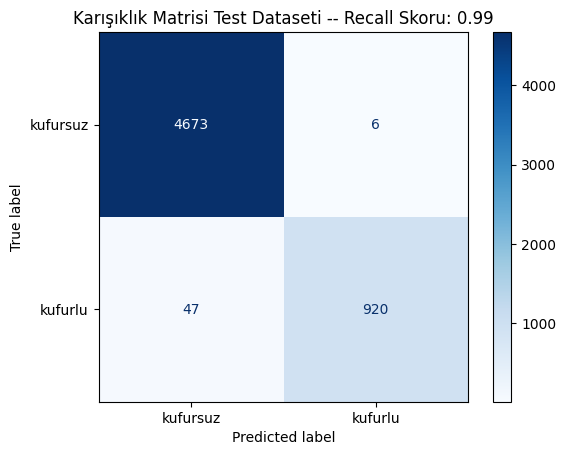

In [ ]:
displayConfusionMatrix(labels_test, model_preds, "Test")

Confusion matrix TN y√ºksek √ßƒ±kmasƒ± zaten k√ºf√ºrs√ºz tweetler fazla olduƒüu i√ßindir. K√ºf√ºrs√ºz tweetlerin √ßok azƒ± k√ºf√ºrl√º (FP) olarak algƒ±lanmƒ±≈ütƒ±r. TP lere baktƒ±ƒüƒ±mda ba≈üarƒ±nƒ±n daha da y√ºksek olduƒüunu g√∂rmekteyim.

***
A≈üaƒüƒ±da modelin testinde hi√ß kullanƒ±lmamƒ±≈ü veri setini indiriyoruz

In [ ]:
dataset2 = load_dataset("anilguven/turkish_tweet_emotion_dataset")
dataset2

Generating train split:   0%|          | 0/4000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 4000
    })
})

In [ ]:
df_tweet = pd.DataFrame(dataset2["train"])
df_tweet.head()

text
0  allahƒ±m √ßƒ±ldƒ±racaƒüƒ±m yemin ederim √ßƒ±ldƒ±racaƒüƒ±m...
1  site √ßalƒ±≈ütƒ±da √ºr√ºn stoklarƒ± bitti diyor mal m...
2             sebebi neydi baƒüƒ±racaƒüƒ±m kaldƒ± ,kizgin
3  black friday amk √ßƒ±kardƒ±nƒ±z bokuda mal mƒ±sƒ±nƒ±z...
4  kƒ±sa kƒ±sa cevaplar vericeksen yazƒ±yorsun geriz...

In [ ]:
df_tweet["text"][0]

'allahƒ±m √ßƒ±ldƒ±racaƒüƒ±m yemin ederim √ßƒ±ldƒ±racaƒüƒ±m sinirimden yerden √ßƒ±karamƒ±yorum cam √ßer√ßeve indireceƒüim varsa ,kizgin'

Veriyi incelediƒüimizde verisetinin etiketinin virg√ºll√º olarak geldiƒüini g√∂rmekteyiz. D√ºzenlem i√ßin veri setini tweet target olarak ayrƒ± d√ºzenliyoruz

In [ ]:
dataset3_tweet = pd.DataFrame(columns=["tweet","target"])
dataset3_tweet

Empty DataFrame
Columns: [tweet, target]
Index: []

In [ ]:
dataset3_tweet[["tweet","target"]] =  df_tweet["text"].str.split(',',expand=True)
dataset3_tweet.head()

tweet  target
0  allahƒ±m √ßƒ±ldƒ±racaƒüƒ±m yemin ederim √ßƒ±ldƒ±racaƒüƒ±m...  kizgin
1  site √ßalƒ±≈ütƒ±da √ºr√ºn stoklarƒ± bitti diyor mal m...  kizgin
2                    sebebi neydi baƒüƒ±racaƒüƒ±m kaldƒ±   kizgin
3  black friday amk √ßƒ±kardƒ±nƒ±z bokuda mal mƒ±sƒ±nƒ±z...  kizgin
4  kƒ±sa kƒ±sa cevaplar vericeksen yazƒ±yorsun geriz...  kizgin

In [ ]:
from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)

In [ ]:
morphology = TurkishMorphology.create_with_defaults()

INFO:zemberek.morphology.turkish_morphology:TurkishMorphology instance initialized in 10.507125854492188


2024-05-07 16:48:41,496 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 10.507125854492188



veri setini modelimizdeki girdiye uygun olarak morfolojik √ßƒ±ktƒ±larƒ±mƒ±za g√∂re d√ºzenliyoruz

In [ ]:
lemSen = []
for index , row in dataset3_tweet.iterrows():
  words = row["tweet"]
  newSentence = []
  for word in words.split(" "):
    if word == '':
      continue
    else:
      results = morphology.analyze(word)
      if len(results.analysis_results) == 0:
        continue

      newSentence.append(results.analysis_results[0].format_string().split(" ")[0])
  lemSen.append( newSentence)

In [ ]:
dataset3_tweet["tagged_tweet"] = lemSen

In [ ]:
dataset3_tweet["tagged_tweet"] = dataset3_tweet["tagged_tweet"].apply(clean_brackets)

Veri setimizi bert modelindeki metin haritalamasƒ±na uygun ≈üekilde d√ºzenliyoruz

In [ ]:
def prep_data(text):
  import tensorflow as tf

  # 1. Predict edeceƒüimiz yeni g√∂zlemleri √∂ncelikle token embeddings (input_ids) ve position embeddings (attention_mask) matrixlerine d√∂n√º≈üt√ºr√ºyoruz.
  #    Bu fonksiyonu kullanabilmek i√ßin √∂ncelikle transformation funksiyonunu √ßalƒ±≈ütƒ±rmanƒ±z gerektiƒüini unutmayƒ±n.
  Xids_obs, Xmask_obs = transformation(text)

  # 2. Xids_obs, Xmask_obs matrixlerimizi tenserflow tens√∂rlerine d√∂n√º≈üt√ºr√ºyoruz.
  dataset_obs = tf.data.Dataset.from_tensor_slices((Xids_obs, Xmask_obs))

  # 3. D√∂n√º≈üt√ºrd√ºƒü√ºm√ºz tensorflow tens√∂rlerini modelin tanƒ±yabilmesi i√ßin "input_ids" ve "attention_mask" olarak isimlendiriyoruz.
  def map_func(Tensor_Xids, Tensor_Xmask):
       return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}

  dataset_obs = dataset_obs.map(map_func)

  # 4. Son a≈üama olarak tensorflow tens√∂rlerimizi train datasƒ±nda olduƒüu gibi 32'li paketler haline getiriyoruz. Yoksa shape uyumsuzluk hatasƒ± alƒ±rƒ±z.
  batch_size = 32 # eƒüitim datasƒ±na uygulanan batch_size'ƒ± uyguluyoruz.
  obs_ds = dataset_obs.batch(batch_size)

  return obs_ds

In [ ]:
prep_test = prep_data(dataset3_tweet["tagged_tweet"].to_list())

In [ ]:
model_pred_probs_test = loaded_model.predict(prep_test)

In [ ]:
model_test_preds = tf.round(model_pred_probs_test)

In [ ]:
test_preds = tf.cast(model_test_preds, dtype= tf.int32)

In [ ]:
class_names[0]

'kufursuz'

In [ ]:
test_pred_classes = [class_names[pred] for pred in test_preds]

In [ ]:
dataset3_tweet.head(5)

tweet  target  \
0  allahƒ±m √ßƒ±ldƒ±racaƒüƒ±m yemin ederim √ßƒ±ldƒ±racaƒüƒ±m...  kizgin   
1  site √ßalƒ±≈ütƒ±da √ºr√ºn stoklarƒ± bitti diyor mal m...  kizgin   
2                    sebebi neydi baƒüƒ±racaƒüƒ±m kaldƒ±   kizgin   
3  black friday amk √ßƒ±kardƒ±nƒ±z bokuda mal mƒ±sƒ±nƒ±z...  kizgin   
4  kƒ±sa kƒ±sa cevaplar vericeksen yazƒ±yorsun geriz...  kizgin   

                                        tagged_tweet  
0  'allah:noun' '√ßƒ±ldƒ±rmak:verb' 'yem:noun' 'etme...  
1  'sit:noun' '√ºr√ºn:noun' 'stok:noun' 'bitmek:ver...  
2  'sebep:noun' 'ne:adj' 'baƒüƒ±rmak:verb' 'kalmak:...  
3  'black:noun' 'friday:noun' '√ßƒ±karmak:verb' 'ma...  
4  'kƒ±sa:adj' 'kƒ±sa:adj' 'cevaplamak:verb' 'yazma...

In [ ]:
dataset3_tweet["label"] = test_pred_classes
dataset3_tweet.head()

tweet  target  \
0  allahƒ±m √ßƒ±ldƒ±racaƒüƒ±m yemin ederim √ßƒ±ldƒ±racaƒüƒ±m...  kizgin   
1  site √ßalƒ±≈ütƒ±da √ºr√ºn stoklarƒ± bitti diyor mal m...  kizgin   
2                    sebebi neydi baƒüƒ±racaƒüƒ±m kaldƒ±   kizgin   
3  black friday amk √ßƒ±kardƒ±nƒ±z bokuda mal mƒ±sƒ±nƒ±z...  kizgin   
4  kƒ±sa kƒ±sa cevaplar vericeksen yazƒ±yorsun geriz...  kizgin   

                                        tagged_tweet       label  
0  'allah:noun' '√ßƒ±ldƒ±rmak:verb' 'yem:noun' 'etme...   [kufurlu]  
1  'sit:noun' '√ºr√ºn:noun' 'stok:noun' 'bitmek:ver...   [kufurlu]  
2  'sebep:noun' 'ne:adj' 'baƒüƒ±rmak:verb' 'kalmak:...  [kufursuz]  
3  'black:noun' 'friday:noun' '√ßƒ±karmak:verb' 'ma...   [kufurlu]  
4  'kƒ±sa:adj' 'kƒ±sa:adj' 'cevaplamak:verb' 'yazma...   [kufurlu]

In [ ]:
final_dataset = dataset3_tweet[["tweet","label" ]].copy()
final_dataset.head()

tweet       label
0  allahƒ±m √ßƒ±ldƒ±racaƒüƒ±m yemin ederim √ßƒ±ldƒ±racaƒüƒ±m...   [kufurlu]
1  site √ßalƒ±≈ütƒ±da √ºr√ºn stoklarƒ± bitti diyor mal m...   [kufurlu]
2                    sebebi neydi baƒüƒ±racaƒüƒ±m kaldƒ±   [kufursuz]
3  black friday amk √ßƒ±kardƒ±nƒ±z bokuda mal mƒ±sƒ±nƒ±z...   [kufurlu]
4  kƒ±sa kƒ±sa cevaplar vericeksen yazƒ±yorsun geriz...   [kufurlu]

In [ ]:
final_dataset["label"] = final_dataset["label"].apply(clean_brackets)
final_dataset.head()

tweet       label
0  allahƒ±m √ßƒ±ldƒ±racaƒüƒ±m yemin ederim √ßƒ±ldƒ±racaƒüƒ±m...   'kufurlu'
1  site √ßalƒ±≈ütƒ±da √ºr√ºn stoklarƒ± bitti diyor mal m...   'kufurlu'
2                    sebebi neydi baƒüƒ±racaƒüƒ±m kaldƒ±   'kufursuz'
3  black friday amk √ßƒ±kardƒ±nƒ±z bokuda mal mƒ±sƒ±nƒ±z...   'kufurlu'
4  kƒ±sa kƒ±sa cevaplar vericeksen yazƒ±yorsun geriz...   'kufurlu'